# **Gene Expression Cancer RNA-Seq Analysis**

## Context

RNA sequencing (RNAseq) is one of the most commonly used techniques in life sciences and has been widely used in cancer research, drug development, and cancer diagnosis and prognosis. Sequencing the coding regions or the whole cancer transcriptome can provide valuable information about gene expression changes in tumors. Cancer RNA-Seq enables the detection of strand-specific information, an important component of gene regulation. Cancer transcriptome sequencing captures both coding and non-coding RNA and provides strand orientation for a complete view of expression dynamics.

## Objective

To use the Principal Component Analysis (PCA) technique to transform a large set of variables into a smaller one that still contains most of the information in the large set


## Key Concepts

- Applying PCA for dimensionality reduction
- Visualizing the data in the lower dimension


## Data Description

This collection of data is part of the RNA-Seq (HiSeq) PANCAN data set, it is a random extraction of gene expressions of patients having different types of tumor:

- BRCA
- KIRC
- COAD
- LUAD
- PRAD


Samples (instances) are stored row-wise. Variables (attributes) of each sample are RNA-Seq gene expression levels measured by illumina HiSeq platform.

A dummy name (gene_X) is given to each attribute.

## Let's start coding!

### Importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to perform PCA
from sklearn.decomposition import PCA

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [2]:
# loading the dataset
data = pd.read_csv("gene_data/data.csv", index_col=[0])
labels = pd.read_csv("gene_data/labels.csv", index_col=[0])

<IPython.core.display.Javascript object>

In [3]:
data.shape

(801, 20531)

<IPython.core.display.Javascript object>

- The data has 801 observations and 20531 attributes.

In [4]:
data.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


<IPython.core.display.Javascript object>

In [5]:
labels.head()

,Class
sample_0,PRAD
sample_1,LUAD
sample_2,PRAD
sample_3,PRAD
sample_4,BRCA


<IPython.core.display.Javascript object>

- In the above output, the `Class` depicts the type of tumor out of the five types (*PRAD*, *LUAD*, *BRCA*, *KIRC*, and *COAD*).

**Let's combine the data and its labels.**

In [6]:
frames = [labels, data]
df = pd.concat(frames, axis=1)
df.reset_index(drop=True, inplace=True)

# checking the shape of the combined dataframe
df.shape

(801, 20532)

<IPython.core.display.Javascript object>

In [7]:
df.head()

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


<IPython.core.display.Javascript object>

## Data Preprocessing

- Normalization is important in PCA as it is a variance maximizing exercise.
- PCA projects the original data onto directions that maximize the variance.

In [8]:
X = df.iloc[:, 1:].values

# normalizing the features
X = StandardScaler().fit_transform(X)

<IPython.core.display.Javascript object>

In [9]:
X.shape

(801, 20531)

<IPython.core.display.Javascript object>

In [10]:
# checking the mean and standard deviation
np.mean(X), np.std(X)

(-1.091446422314019e-18, 0.9934763587711302)

<IPython.core.display.Javascript object>

- The mean is nearly equal to zero and the variance is nearly 1 as we normalized the data.

## Applying Principal Component Analysis (PCA)

**In the next few lines of code, we will be projecting the 20531-dimensional Cancer RNA-seq data to two-dimensions using PCA.**

- Original dimensions = 20531
- Dimensions after applying PCA = 2

**Note**: We only use the features for dimensionality reduction, we don't need labels.

In [11]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

<IPython.core.display.Javascript object>

**Let's convert the above result into a dataframe.**

In [12]:
pca_df = pd.DataFrame(
    data=pca_data, columns=["Principal Component 1", "Principal Component 2"]
)
pca_df.tail()

,Principal Component 1,Principal Component 2
796,-12.417385,-42.321573
797,-29.415554,28.526281
798,-4.133090,15.690014
799,-30.814757,33.526422
800,-22.344557,4.052356


<IPython.core.display.Javascript object>

In [13]:
print(
    "Explained variance per principal component: {}".format(
        pca.explained_variance_ratio_
    )
)

Explained variance per principal component: [0.10539781 0.08754232]


<IPython.core.display.Javascript object>

**Observations**

- In the above result, the explained variance is shown.

    - The first principal component explains 10.54% of total variance in the data.
    - The second principal component explains 8.75% of total variance in the data.

- We see a huge reduction in dimensions, from 20531 to 2, and the 2 dimensions explain nearly 20% of total variance in the data.

- In some other cases, i.e., some other datasets, PCA is able to explain significantly larger variance than we see in this case.

    - For example, 2 principal components are able to explain more than 90% of variance in the dataset.

In [14]:
# defining the targets
targets = list(df.Class.unique())
targets

['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD']

<IPython.core.display.Javascript object>

## Visualizing the data in the lower dimension

- We can visualize data in 2 dimensions and also data in 3 dimensions (using 3-D plots).
- In some cases, we can also visualize data in 4 dimensions by using different hues for the 4th dimension in a 3-D plot.
- But it's impossible for us to visualize and interpret data in 20531 dimensions.
- So using PCA, we scaled down to 2 dimensions, and now it's easy for us to visualize the data.

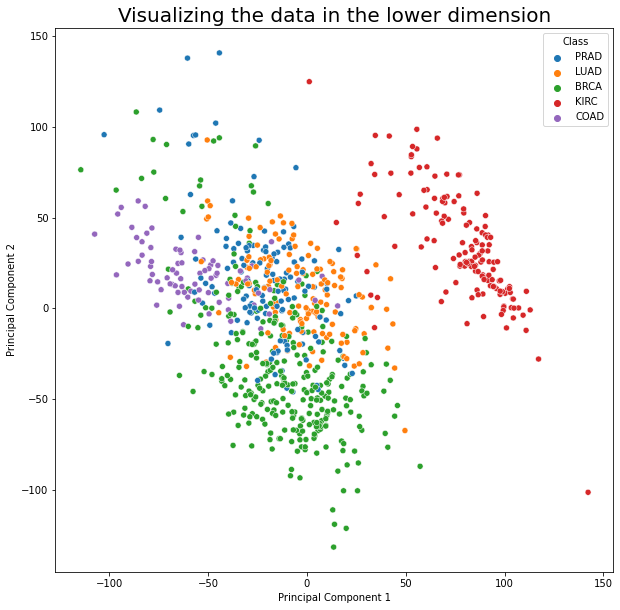

<IPython.core.display.Javascript object>

In [15]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=pca_df, x="Principal Component 1", y="Principal Component 2", hue=df.Class
)
plt.title("Visualizing the data in the lower dimension", fontsize=20)
plt.show()

## Insights

- From the above plot, we can observe that the five classes (**PRAD**, **LUAD**, **BRCA**, **KIRC**, **COAD**), when projected to a two-dimensional space, can be linearly separable up to some extent.
- Other observations can be that the **KIRC** class is clearly separated out as compared to the other class.

## Add-on: Applying t-distributed Stochastic Neighbor Embedding (t-SNE)

**In the next few lines of code, we will be projecting the 20531-dimensional Cancer RNA-seq data to two-dimensions using t-SNE.**

- Original dimensions = 20531
- Dimensions after applying t-SNE = 2

**Note**: t-SNE is covered in the additional learning material of Week 2.

In [16]:
# to perform t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=1)
tsne_data = tsne.fit_transform(X)

<IPython.core.display.Javascript object>

**Let's convert the above result into a dataframe.**

In [17]:
tsne_df = pd.DataFrame(data=tsne_data, columns=["Component 1", "Component 2"])
tsne_df.tail()

,Component 1,Component 2
796,-14.938532,8.140863
797,9.174356,-0.517968
798,22.201982,-13.317844
799,7.012878,31.732162
800,12.510225,30.414379


<IPython.core.display.Javascript object>

## Visualizing the data in the lower dimension

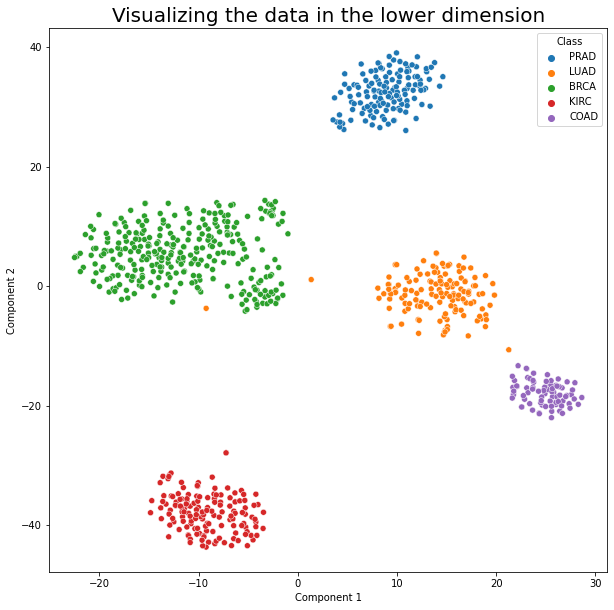

<IPython.core.display.Javascript object>

In [18]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=tsne_df, x="Component 1", y="Component 2", hue=df.Class)
plt.title("Visualizing the data in the lower dimension", fontsize=20)
plt.show()

## Insights

- From the above plot, we can observe that the five classes (**PRAD**, **LUAD**, **BRCA**, **KIRC**, **COAD**), when projected to a two-dimensional space, are linearly separable to a large extent.
- A few points from the **LUAD** class are far away from the rest and closer to the **KIRK** class.

### Let's try running t-SNE with different values of perplexity

Visualizing the lower dimensional representation of data for different values of perplexity


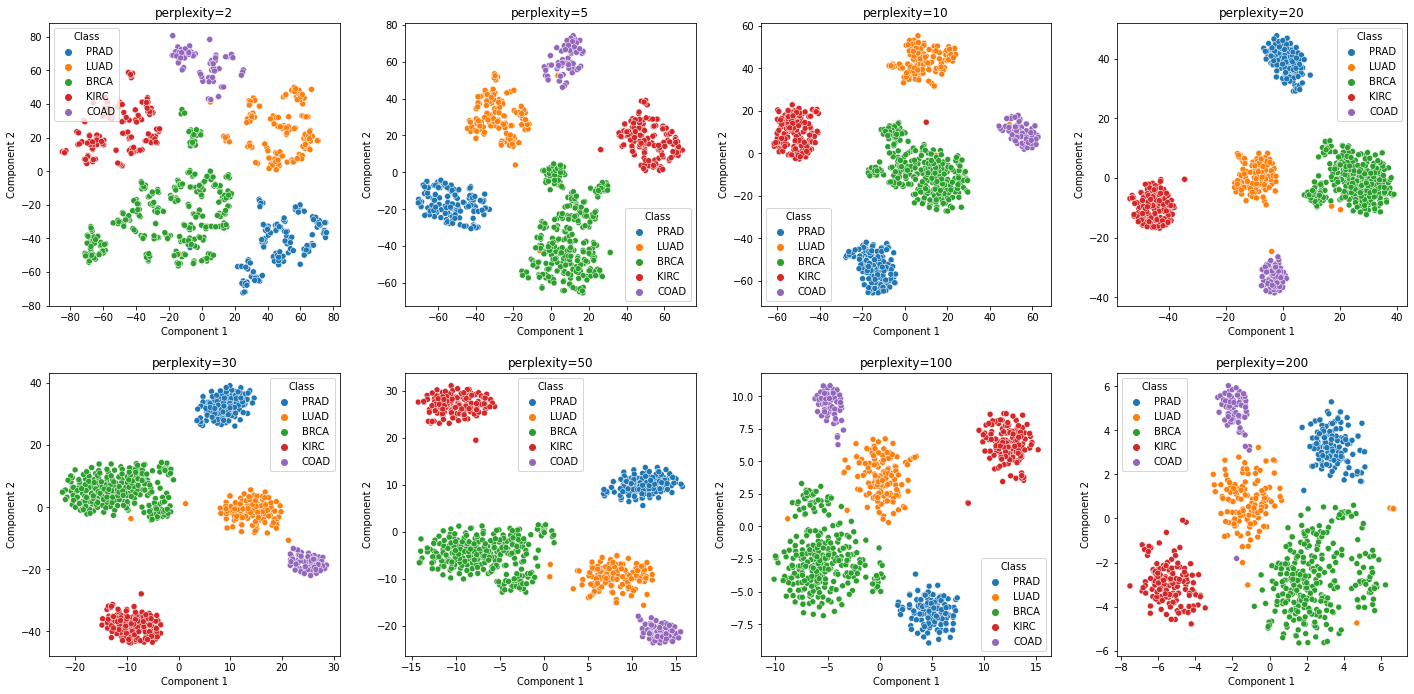

<IPython.core.display.Javascript object>

In [19]:
perplexity = [2, 5, 10, 20, 30, 50, 100, 200]

plt.figure(figsize=(20, 10))
print(
    "Visualizing the lower dimensional representation of data for different values of perplexity"
)

for i in range(len(perplexity)):
    tsne = TSNE(n_components=2, perplexity=perplexity[i], n_jobs=-2, random_state=1)
    # n_jobs specifies the number of parallel jobs to run
    # -2 means using all processors except one
    X_red = tsne.fit_transform(X)

    red_data_df = pd.DataFrame(data=X_red, columns=["Component 1", "Component 2"])

    plt.subplot(2, int(len(perplexity) / 2), i + 1)

    plt.title("perplexity=" + str(perplexity[i]))
    sns.scatterplot(data=red_data_df, x="Component 1", y="Component 2", hue=df.Class),
    plt.tight_layout(pad=2)

### Observations

* With low perplexity value (2), data points are more scattered.
* With perplexity values ranging from 5 to 50, three distinct groups are clearly visible.
* With very high value of perplexity (100 and 200), the groups are still separable but slightly more spread out.